<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L05%20-%20Multi-class%20classification%20-%20One%20vs%20All_solved.ipynb)

# Labor 05: Multi-class classification - One vs All

### Handwritten numbers I.

In this exercise, we will use logistic regression to classifie handwritten digits (between 0 and 9). This is a common task nowadays, from reading postal codes to recognising numbers written on bank accounts and beyond.

### 1: Import packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

2025-01-05 16:54:45.562875: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-05 16:54:45.654137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736096085.687679   13463 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736096085.698484   13463 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 16:54:45.785562: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### 2: Data load and visualisation

The MNIST dataset will be used which is included in the Keras framework. The dataset contains 60000 sample images of 28x28 pixels. Since pixel positions won't be used the data will be flattened for simple data handling, In the matrix, one sample corresponds to one row, for which the images are expanded. Also the pixel values are normalized between 0 and 1. An example of the expansion is shown below.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab05/Pics/L05_Flatten.png?raw=1" width=450>

Accordingly, scanning the data will give us a 5000x748 input matrix and a 5000x1 matrix containing the labels.

To display the images, we need to resample them accordingly. Later in our algorithm, each pixel will be counted as an input variable, and each pixel value will be a grayscale value normalized between 0-2.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape of the dataset in order X and Y:
 (5000, 784) 
 (5000, 1) 

Now showing some random data from the dataset ...


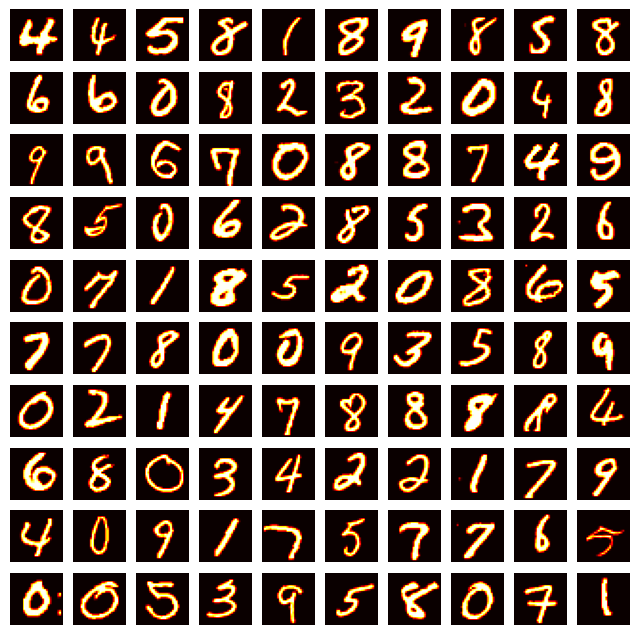

In [4]:
(x_data, y_data), _ = mnist.load_data()

X = (x_data[0:5000, :, :].reshape((5000, -1)))/256            # flatten and normalization
Y = y_data[0:5000].reshape((5000, -1))
m = X.shape[0]

print('''Shape of the dataset in order X and Y:
''',X.shape,'\n',Y.shape,'\n')

print("Now showing some random data from the dataset ...")
fig, axis = plt.subplots(10,10,figsize = (8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,m),:].reshape(28,28,order="C"),cmap="hot")
        axis[i,j].axis("off")
plt.show()

### 3: Cost function and Gradient Descent

Reminder: <br>
In previous exercises we introduced the following cost function, which was used to separate 2 classes. We only distinguished between $y=0\ and y=1$.

$ C(w)=-\frac{1}{m}\sum_{i=1}^{m}y^i\cdot log(h_w(x^i))+(1-y^i)\cdot log(1-h_w(x^i))+\frac{\lambda}{2m}\sum_{j=1}^nw_j^2 $

The derivative of the cost function for the gradient method is calculated using the following formula:

$ \frac{\partial}{\partial w_j}C(w)=\frac{1}{m}\sum_{i=1}^{m}(h_w(x^i)-y^i)\cdot x_j^i+\frac{\lambda}{m}w_j $ <br>
, where we make sure that the BIAS member is not penalised!

Then the weights were modified using the basic formula of the Gradient Descent weight modifier:

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}C(w)$

These three key steps make up the Gradient Descent algorithm.

Write the function lrCostFunction() that computes the cost function and gradients.

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def lrCostFunction(w,X,Y,Lambda):
    ################### CODE HERE ########################
    # Implement a Cost function incorporating the learning rate parameter
    m = X.shape[0]
    pred = sigmoid(np.matmul(X, w))
    w_reg = (Lambda/(2*m)) * np.sum(w[1:]**2)
    C = -(1/m) * np.sum(Y * np.log(pred) + (1-Y) * np.log(1-pred)) + w_reg
    error = pred - Y
    grad = (1/m) * np.matmul(X.T, error)
    grad[1:] += (Lambda / m) * w[1:]
    #######################################################

    return C, grad

In [6]:
# Test case
w_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t = np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)),X_t))
Y_t = np.array([1,0,1,0,1]).reshape(5,1)
Lambda = 3

C,grad = lrCostFunction(w_t, X_t, Y_t, Lambda)
print('\nTest weight: [-2 -1 1 2]\n''''
Testing lrCostFunction() with regularization ...
Cost function value: %.6f''' % C, ' (Expected: 2.534819)')
print('''\nExpected gradients:
 [[0.146561]
 [-0.548558]
 [0.724722]
 [1.398003]]
Computed gradients:\n''',grad)


Test weight: [-2 -1 1 2]

Testing lrCostFunction() with regularization ...
Cost function value: 2.534819  (Expected: 2.534819)

Expected gradients:
 [[0.146561]
 [-0.548558]
 [0.724722]
 [1.398003]]
Computed gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


Write the function gradientDescent() that performs gradient descent. In each iteration, store the current cost value in a variable to keep track of the run.

In [7]:
def gradientDescent(X,Y,w,learning_rate,num_iters,Lambda):
    ################### CODE HERE ########################
    # Implemen the Gradient Descent algorithm
    # Use the previously implemented lrCostFunction()

    C_history = []
    for _ in range(num_iters):
        cost, grad = lrCostFunction(w, X, Y, Lambda)
        C_history.append(cost)
        w = w - learning_rate*grad

    #####################################################

    return w, C_history

### 4: One vs All

Our goal is to extend the 2 class classifier, which we have already learned and coded, to split multiple classes. We can do this along a simple consideration. Let us derive any classification problem to separate two classes and perform this procedure as many times as we want to separate the classes.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab05/Pics/L05_OneVSAll.png?raw=1" width=450>

Thus, our hypothesis function assigns to each sample as many probabilities as we have classes. Given this, our decision will be which class will have the highest probability.

$h_{w}^{(i)} = P(y=i|_{x,w})$ <br>
,where the illustration above shows $i = 1,2,3$.

When you divide the numbers, you will have 10 divisions, as the digits range from 0 to 9. The thing to note is that in the database, the digits 0 are marked with 10.

In [8]:
def oneVsAll(X, Y, num_labels, Lambda):
    m, n = X.shape[0],X.shape[1]
    w_init = np.zeros((n + 1, 1))
    w_all = []
    C_all = []

    ################### CODE HERE ########################
    # Implement the One vs All algorithm
    # Do not forget to add the BIAS to the input X data
    X = np.hstack((np.ones((m,1)), X))

    for i in range(1,num_labels + 1):
        w, C_history = gradientDescent(X, np.where(Y == i, 1, 0), w_init, 1, 50, Lambda)
        w_all.append(w)
        C_all.append(C_history)

    w_all = np.array(w_all).reshape(num_labels, -1)
    C_all = np.array(C_all)


    ######################################################
    #
    return w_all, C_all

Run the One Vs ALL algorithm. Experiment with different $\lambda$ parameter settings.

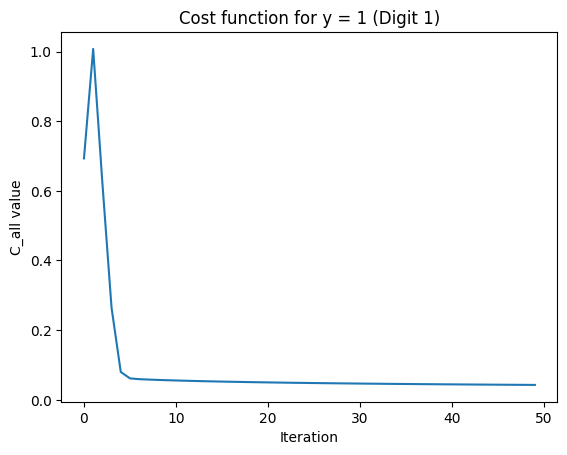

In [9]:
Lambda = 0.1
num_labels = 10

w_all, C_all = oneVsAll(X,Y,num_labels,Lambda)

plt.plot(C_all[0])
plt.title("Cost function for y = 1 (Digit 1)")
plt.xlabel("Iteration")
plt.ylabel("C_all value")
plt.show()

### 5: Prediction and Accuracy

Let's look back at how accurate our trained algorithm would be on the training samples. We now perform the prediction step in a batch method on all samples at once. For each sample, we compute the probability of belonging to all classes, and then select the class with the highest probability among them for our final prediction.

In [ ]:
def predictionOneVsAll(w_all, X):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))

    ################### CODE HERE ########################
    # Implement the prediction step for the One Vs All method
    # Calculate the prediction for every class give an input
    # Choose the class with the highet probability as a prediction
    # Decode the choosen class for a real number representing the prediction.
    class_probs = np.matmul(X, np.transpose(w_all))
    predictions = np.argmax(class_probs, axis = 1)
    predictions += 1 # Needed as indexing starts from 0 in numpy, but not in our classes

    ######################################################

    return predictions

pred = predictionOneVsAll(w_all, X)
acc = sum(pred[:,np.newaxis]==Y)[0]/5000*100
print("Training Set Accuracy: %.2f" % acc,"%")

Training Set Accuracy: 80.98 %


<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>